<html>
<h1 style="text-align: center;">Peer to peer</h1>
<h3 style="text-align: center;">streaming capacity</h3>
<br />
</html>


# Contents
1. Introduction
2. Construction of mutitree
3. Primal-Dual Algorithm
   * Problem formulation
   * Smallest price tree problem
4. Numerical result
   * optimality
   * theoretical vs empirical convergence
5. (How to avoid free riding?)  <- It is interesting if we can discuss it.
5. Conclusion  
 
6. References

## 1. Introduction


==========Need to write==========




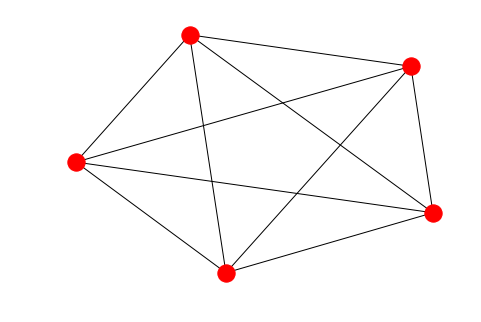

In [1]:
# example of a complete graph
import networkx as nx
import matplotlib.pyplot as plt
K_5=nx.complete_graph(5)
nx.draw(K_5)
plt.show()

## 2. Construction of mutitree
Here we introduce the optimal construction of multitree with the simplest topology, i.e. full mesh, no degree bound and without helper nodes. 
Let's begin with a little reminder : A Multi-Tree architechture is a combinaison of different trees of a network. It is used to get higher capacity performance.

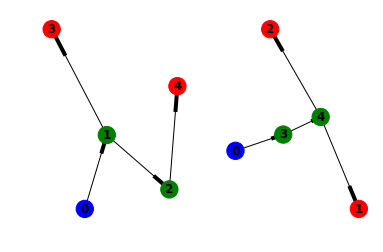

In [39]:
G = nx.DiGraph()
G.add_nodes_from([0,1,2,3,4])
G.add_edges_from([(0, 1),(1, 2), (1, 3),(2, 4)])
color_map_G = ['blue','green','green','red','red']

F = nx.DiGraph()
F.add_nodes_from([0,1,2,3,4])
F.add_edges_from([(0, 3),(3, 4), (4, 2),(4, 1)])
color_map_F = ['blue','red','red','green','green']

plt.subplot(121)
nx.draw(G,node_color=color_map_G, with_labels=True,font_weight='bold')
plt.subplot(122)
nx.draw(F,node_color=color_map_F,with_labels=True,font_weight='bold')
plt.show()

s you can see on the 2 graphs above, the stream capacity of every node is not fully used (3 & 4 for graph 1 and 1 & 2 for graph 2). Thus, a Multi-Tree would benefit to use the upload capacity of every peer.

The construction of a Multi-Tree is not a exact science since it requires to solve difficult combinatorial optimization problem. But the basic idea is to put the peers with a lot of leftover upload capacity higher up in the Multi-Tree and in some special cases, the equation is easy to solve ! Let me show you: let's assume that every peer has a capacity of download illimited. Then we want to prove that the total amount of time of downloading T is the larger of the two following numbers : 

$T = max\{\frac{F}{u_s} , \frac{NF}{u_s + \sum_{i=1}^Nu_i}\} $  <-->  $ r_{max} = min\{ u_s , \frac{u_s + \sum_{i=1}^Nu_i}{N} \} $

This relation can be proved using its inversed relation : the maximum broadcast rate $r_max$ is just the inversed of the first relation, it can also be used to solve the problem. Thus, two different cases appear : One is when the upload capacity of the server $u_s$ is smaller then the mean of every peer's capacity and the second one is the opposite situation

### 2.1 case 1:  $u_s \leq \frac{(u_s + \sum_{i=1}^Nu_i)}{N}$


In this situation, the maximum broadcast rate of $r_{max} = u_s$ can be supported. So the multi-tree would be a combinaison of N two-hop trees where each tree is composed like the following :

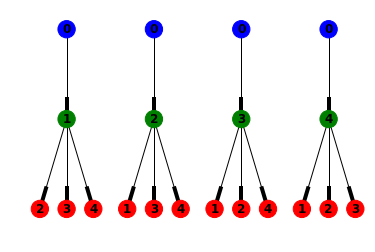

In [55]:
G = nx.DiGraph()
G.add_node(0,pos=(2,4)), G.add_node(1,pos=(2,3)), G.add_node(2,pos=(1.5,2)),G.add_node(3,pos=(2,2)),G.add_node(4,pos=(2.5,2))
G.add_edges_from([(0, 1),(1, 2), (1, 3),(1, 4)])
pos1=nx.get_node_attributes(G,'pos')

F = nx.DiGraph()
F.add_node(0,pos=(2,4)), F.add_node(2,pos=(2,3)), F.add_node(1,pos=(1.5,2)),F.add_node(3,pos=(2,2)),F.add_node(4,pos=(2.5,2))
F.add_edges_from([(0, 2),(2, 1), (2, 3),(2, 4)])
pos2=nx.get_node_attributes(F,'pos')

D = nx.DiGraph()
D.add_node(0,pos=(2,4)), D.add_node(3,pos=(2,3)), D.add_node(1,pos=(1.5,2)),D.add_node(2,pos=(2,2)),D.add_node(4,pos=(2.5,2))
D.add_edges_from([(0, 3),(3, 1), (3, 2),(3, 4)])
pos3=nx.get_node_attributes(D,'pos')

S = nx.DiGraph()
S.add_node(0,pos=(2,4)), S.add_node(4,pos=(2,3)), S.add_node(1,pos=(1.5,2)),S.add_node(2,pos=(2,2)),S.add_node(3,pos=(2.5,2))
S.add_edges_from([(0, 4),(4, 1), (4, 2),(4, 3)])
pos4=nx.get_node_attributes(S,'pos')
color_map = ['blue','green','red','red','red']

plt.subplot(141)
nx.draw(G,pos1,node_color=color_map,with_labels=True,font_weight='bold')
plt.subplot(142)
nx.draw(F,pos2,node_color=color_map,with_labels=True,font_weight='bold')
plt.subplot(143)
nx.draw(D,pos3,node_color=color_map,with_labels=True,font_weight='bold')
plt.subplot(144)
nx.draw(S,pos4,node_color=color_map,with_labels=True,font_weight='bold')
plt.show()

In this configuration, we can clearly see that the trees that have peers with a high upload capacity near the root with stream the informations at a higher rate. 

Since the total upload required for the server equals its capacity, $\sum_{i=1}^Nr_i = u_s$, we can find that each tree's rate is equal to : $r_i = \frac{u_i}{\sum_{j=1}^Nu_j}$.

Given these 2 relations about the rate ofeach peer and starting from the assumption of this case, we can find the total upload capacity required for every peer i :

$N u_s \leq (u_s + \sum_{i=1}^Nu_i) \Longrightarrow N u_s (\frac{u_i}{\sum_{j=1}^Nu_j}) \leq \frac{u_i u_s}{\sum_{j=1}^Nu_j} + u_i \iff (N - 1) \frac{u_i}{\sum_{j=1}^Nu_j} u_s \leq u_i$

It implies that the total upload capacity required for each peer would equal : $ (N - 1) r_i = (N - 1) \frac{u_i}{\sum_{j=1}^Nu_j} u_s \leq u_i$. 

It now means that each peer in the Multi-Tree Structure receives a data stream directly from the server and it receives also (N-1) streams from the other peers. The result is that each peer i will have a broadcast rate equals to : $r_{max} = r_i + \sum_{j \neq 1}^Nr_j $.

Hence, looking back at the equation of the total downloading time of a file will be $T = \frac{T}{u_s}$.

### 2.1 case 2: $u_s > \frac{(u_s + \sum_{i=1}^Nu_i)}{N}$

In this situation, the maximum broadcast rate supported would be equal to $r_{max} = \frac{(u_s + \sum_{i=1}^Nu_i)}{N}$ and the server upload capacity is large enough to stream to every peer directly in addition to stream via a two hop Multu-tree system like in the first case ! Thus, the Multi-Tree of such a configuration would look like just the first case adding this sub-tree : 

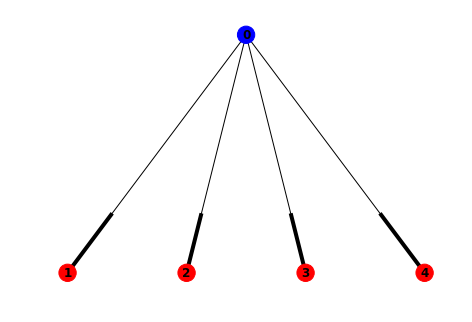

In [59]:
G = nx.DiGraph()
G.add_node(0,pos=(2.5,4)), G.add_node(1,pos=(1,3)), G.add_node(2,pos=(2,3)),G.add_node(3,pos=(3,3)),G.add_node(4,pos=(4,3))
G.add_edges_from([(0, 1),(0, 2), (0, 3),(0, 4)])
pos1=nx.get_node_attributes(G,'pos')
color_map = ['blue','red','red','red','red']
nx.draw(G,pos1,node_color=color_map,with_labels=True,font_weight='bold')
plt.show()

In this case,each ith two hop tree of the Multi-tree would stream with a constant rate : $ r_i = \frac{u_i}{N-1}$ and the N+1 tree (the server client subtree) would carry a rate of $ r_{N+1} = \frac{u_s + \frac{\sum_{i=1}^Nu_i}{N-1}}{N}$. 

It thus means that the total upload capaccity required for each peer i would be $(N-1) r_i = u_i$ and furthermore that the total upload capacity required for server is equal to the sum of every rate passing throught the first peer of each two hop tree and the product of N times the rate throught out each peer in the one hop tree : $\sum_{i=1}^Nr_i + N \cdot r_{N+1}$. Taking the expression of each term we obtain the following equation : $ \frac{u_i}{N-1} + N \cdot \frac{u_s + \frac{\sum_{i=1}^Nu_i}{N-1}}{N}$. In this formula, the first term cancels out with the third one and the result is equal to $u_s$.

In that case, the total broadcast rate at which any peer i in the network receives informations is : $r_{max} = r_{server} + r_{(N-1)peers}  \iff r_{max} = r_i + N \cdot r_{N+1} + \sum_{j \neq i}r_j$.

$ \iff \frac{u_i}{N - 1} + N \cdot \frac{u_s + \frac{\sum_{i=1}^Nu_i}{N-1}}{N} + \sum_{j \neq i} \frac{u_j}{N-1} \Longrightarrow r_{max} = \frac{u_s + \sum_{i=1}^Nu_i}{N}$

Knowing the maximal broadcast rate, we can determine the total amount of time to upload a file looking back at the equation in the introduction of this section : $ T =  \frac{NF}{u_s + \sum_{i=1}^Nu_i}$


### 2.3 Example problem
show a smiple example.

## 3. Primal-Dual algorithm
The method we have introduced is not general, it only works for the certain case. Here we show the method proposed by Sengupta et al. which solves the problem by using primal-dual loops.
### 3.1 Problem formulation (combinatorial optimization)
Show the mathematical formulation

### 3.2 Smallest price tree (SPT)
#### 3.2.1 Type1: Full mesh no degree bound no helper

#### 3.2.2 Type2: Full mesh no degree bound with helper

#### 3.2.3 Type3: Full mesh no degree bound no helper

#### 3.2.3 Type4: Full mesh with degree bound with helper

#### 3.2.3 Type5: General Graph, no degree bound no helper = minimum cost arborescence problem 
(if i could...)



## 4. Numerical result
### 4.1 Optimality
The primal-dual algorithm is not exact, we compare with the multi-cast forumulation.  (implement the algorithms for some toy topologies... )
### 4.2 Convergence
show the convergence of the algorithm vs the theoritical upper bound

Capacity of server: 768
Average capacity  : 550.4
Loop: 1000, Time: 0.052, Price: 0.000000
Loop: 2000, Time: 0.107, Price: 0.000000
Loop: 3000, Time: 0.161, Price: 0.000000
Loop: 4000, Time: 0.214, Price: 0.000001
Loop: 5000, Time: 0.271, Price: 0.095896
Number of loop: 5193, Total time: 0.287

Price of the min tree   : $1.009
Value of dual objective : $550.555
Approx capacity rate    : $548.287


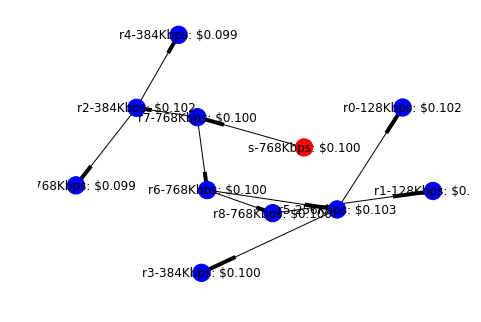

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from source import *

# Set Parameters
N = 10  # number of receivers
H = 5  # number of helpers
M = 2  # Degree bound
# M = N + 1  # NO Degree bound here
V = N + H + 1  # number of nodes (+ server) with helper
C = distribution(N)  # Decide the value of capacity for RECEIVERS
Ch = distribution(H)  # Decide the value of capacity for HELPERS
zeta = 0.1  # value for optimality
eps = 1 - 1 / np.sqrt(1 + zeta)  # rate for updating price
delta = (1 + eps) / (((1 + eps) * (N+1)) ** (1 / eps))  # value for the initial price Without helper
delta_h = (1 + eps) / (((1 + eps) * V) ** (1 / eps))  # value for the initial price With helper

# initialization of nodes
server = Node('s', 768, N + H + 1)  # fix the capacity to 768Kbps
receivers = []
helpers = []
for i in range(N):
    receivers.append(Node('r', C[i], N + H + 1, i))  # initialize the receivers
for i in range(H):
    helpers.append(Node('h', Ch[i], N + H + 1, i))  # initialize the helpers
graph_1 = Graph(1, server, receivers)              # Form 1: Full mesh, No degree bound, No helper
graph_2 = Graph(2, server, receivers, helpers)     # Form 2: Full mesh, No degree bound, With helper
graph_3 = Graph(3, server, receivers, None, M)     # Form 3: Full mesh, With degree bound, No helper
graph_4 = Graph(4, server, receivers, helpers, M)  # Form 4: Full mesh, With degree bound, With helper

# initialize the price for all Forms
graph_1.ini_price(delta)
graph_2.ini_price(delta_h)
graph_3.ini_price(delta)
graph_4.ini_price(delta_h)
# solution of multi-casting, only works for Form 1
print('Capacity of server: {0}'.format(server.capacity))
print('Average capacity  : {0}'.format((sum(C) + server.capacity) / N))

###################
###  Algorithm  ###
###################

# output_capacity, num_loop = primal_dual_single_session(graph_1, eps)
# output_capacity, num_loop = primal_dual_single_session(graph_2, eps)
output_capacity, num_loop = primal_dual_single_session(graph_3, eps)


## 5. Conclusion

## 6. References


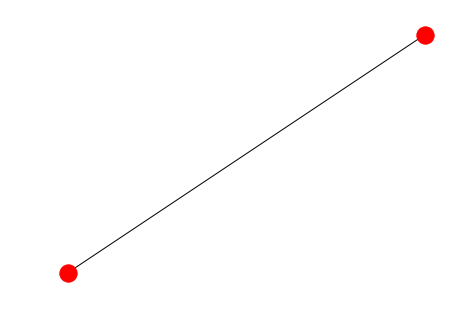

In [24]:
G=nx.Graph()
G.add_node(1,pos=(1,1))
G.add_node(2,pos=(2,2))
G.add_edge(1,2)
pos=nx.get_node_attributes(G,'pos')
nx.draw(G,pos)
plt.show()